### Taxi Out Delay Data Analysis and Modeling

In [62]:
# import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

### Data Analysis

In [65]:
# read data set
df_taxi = pd.read_csv('M1_final.csv')
df_taxi.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


Taxi-out refers to the time a plane spends moving on the airport's taxiways from its gate to the runway prior to takeoff. Taxi-out time is an important factor in calculating the overall runway time for a flight, as longer taxi-out times can increase fuel consumption, affect the scheduling of other flights, and negatively impact the efficiency of an airline's operations. Accurate taxi-out prediction is crucial for airlines to minimize costs and optimize their operations.

#### Check Null Values

In [4]:
df_taxi.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

2 null values in wind columns

#### Remove null values from the dataset

In [6]:
df_taxi.dropna(axis=0, inplace=True)
df_taxi.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

#### Check Data Statistics

In [7]:
df_taxi.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [9]:
df_taxi.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

* Total number of records: 28818
* Total number of categorical features: 6
* Total number of numerical features: 16

#### Correlation between all independent and dependent features

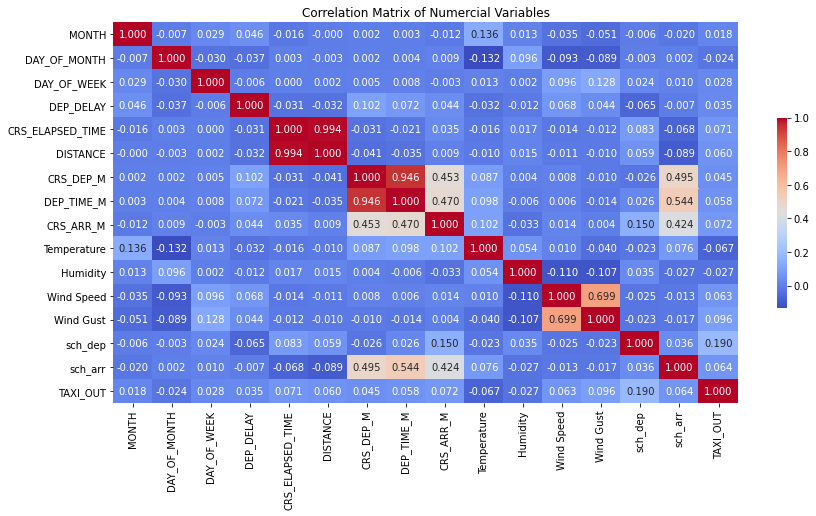

In [10]:
# Select numerical columns for the correlation matrix
df_taxi_numeric_data = df_taxi.select_dtypes(include='int64')

# Calculate the correlation matrix for the numerical data
correlation_matrix = df_taxi_numeric_data.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', square=False, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numercial Variables')
plt.show()


* CRS_DEP_M Scheduled Departure Time and DEP_TIME_M Actual Departure Time(Gate checkout of the flight not the take off time) are highly correlated
* Taxi_out has no linear relationship with any of the independent variables

#### Check Taxi out relationship with independent variables

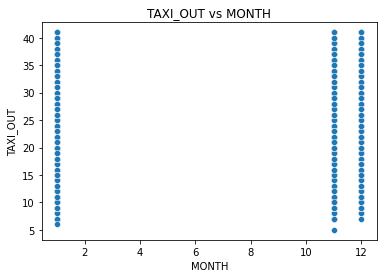

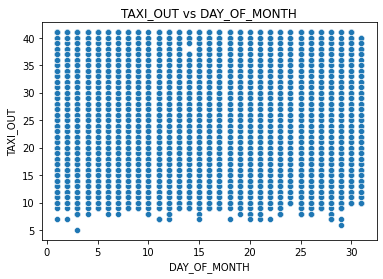

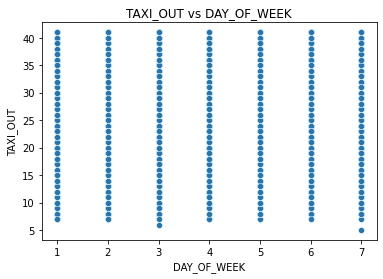

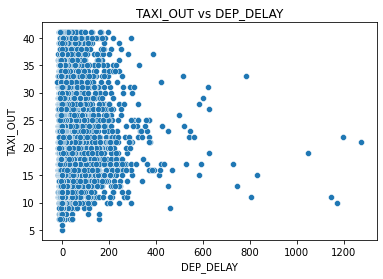

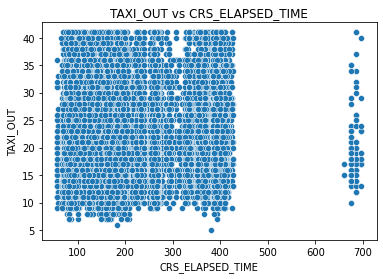

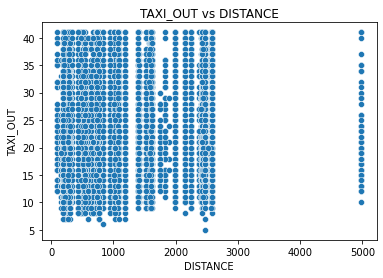

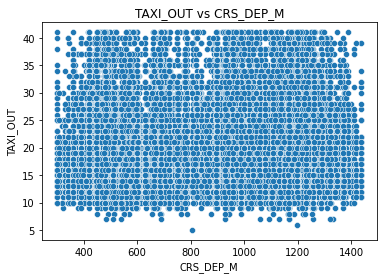

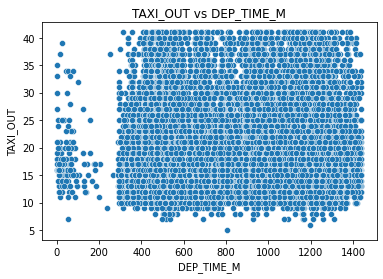

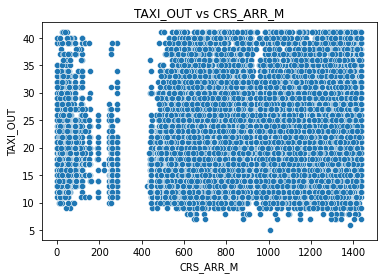

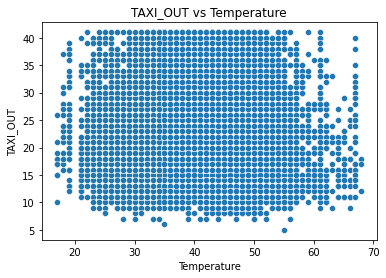

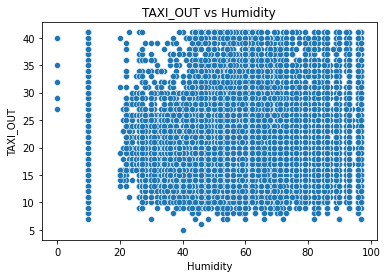

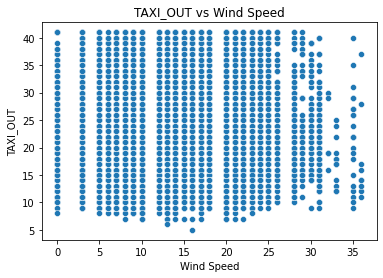

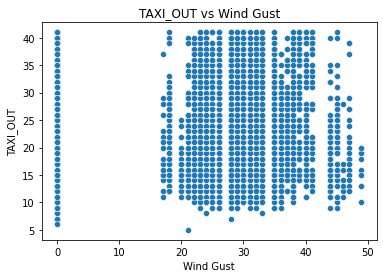

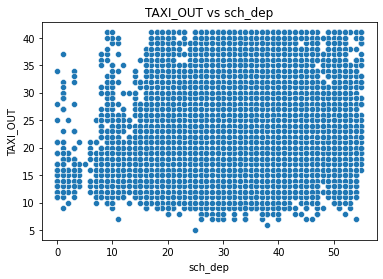

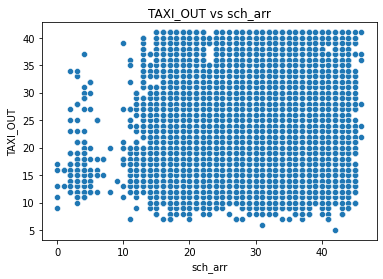

In [12]:
continuous_features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'sch_dep', 'sch_arr']
for feature in continuous_features:
    sns.scatterplot(x=df_taxi[feature], y=df_taxi['TAXI_OUT'])
    plt.title(f'TAXI_OUT vs {feature}')
    plt.show()

#### Indpendent features Histogram 

<function matplotlib.pyplot.show(close=None, block=None)>

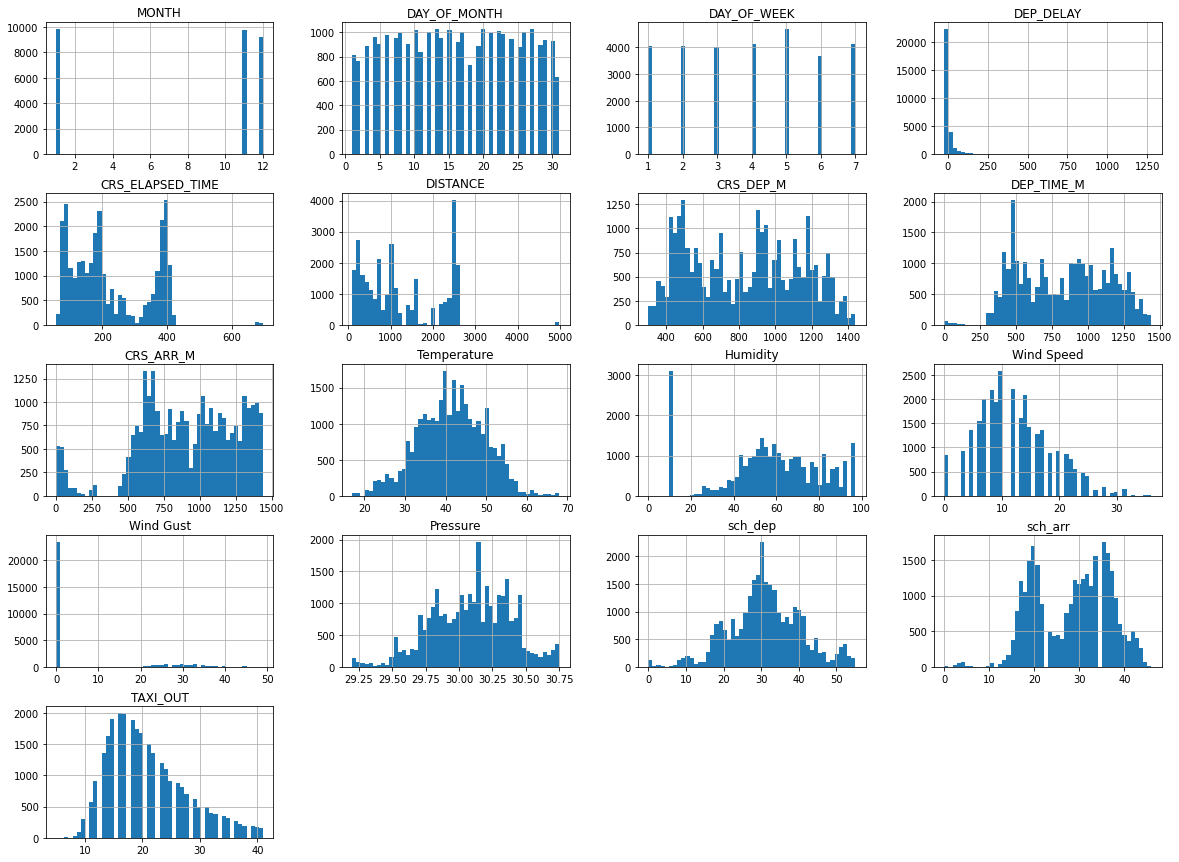

In [14]:
df_taxi.hist(bins=50, figsize=(20, 15))
plt.show

#### Insights 

In [15]:
df_taxi['TAXI_OUT'].describe()

count    28818.000000
mean        20.857207
std          6.850197
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64

The average taxi-out time for flights in the dataset is 20 minutes. 75% of the flights have a delay less than 25 minutes.

In [16]:
df_taxi['DEP_DELAY'].describe()

count    28818.000000
mean         6.373239
std         38.735195
min        -22.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64

 The minimum -22 and maximum was 1276 minutes. 75% of the flights have a departue delay less than 2 minutes.

In [17]:
x = df_taxi.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()
x

DAY_OF_WEEK
1     8.435448
2     7.133087
3     5.388986
4     3.525284
5     4.821580
6    10.132234
7     5.814699
Name: DEP_DELAY, dtype: float64

Day 6 has the highest number of flight departure delays

#### Check outliers for Weather Conditions

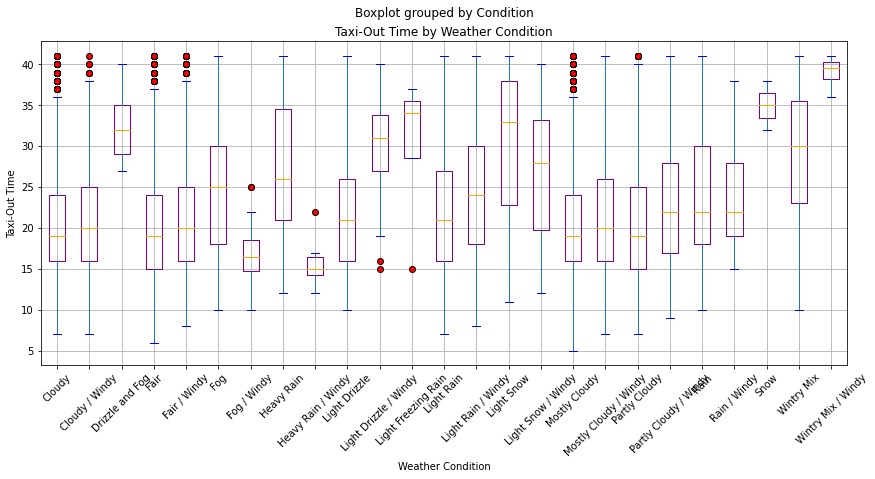

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))

box = df_taxi.boxplot(column='TAXI_OUT', by='Condition', grid=True, ax=ax, boxprops=dict(color='purple'), # Change box color
                              medianprops=dict(color='orange'), # Change median line color
                              capprops=dict(color='blue'), # Change cap color
                              flierprops=dict(markerfacecolor='red', marker='o')) # Change outlier marker

ax.set_title('Taxi-Out Time by Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Taxi-Out Time')
plt.xticks(rotation=45)
plt.show()

In [66]:
categorical_features = ["OP_UNIQUE_CARRIER", "TAIL_NUM", "DEST" ,'Dew Point', 'Wind', 'Condition'] 
numerical_features = ["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "DEP_DELAY", "CRS_ELAPSED_TIME", "DISTANCE", "CRS_DEP_M", "DEP_TIME_M", "CRS_ARR_M", "Temperature", "Humidity", "Wind Speed",	"Wind Gust", "Pressure", "sch_dep", "sch_arr"]

X_numerical = df_taxi[numerical_features]
X_categorical = df_taxi[categorical_features]
Y = df_taxi.iloc[:,-1]
Y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [67]:
# Min Max Scaler: To scale numerical features
minmax_scaler = MinMaxScaler()
X_numerical_scaled = minmax_scaler.fit_transform(X_numerical)
pd.DataFrame(X_numerical_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,0.626749,0.500703,0.501492,0.021861,0.262950,0.240079,0.465733,0.575354,0.632736,0.480193,0.595182,0.343545,0.112966,0.575763,0.565296,0.618090
std,0.453793,0.291673,0.330872,0.029842,0.186691,0.181907,0.263092,0.212553,0.240203,0.157716,0.241945,0.173869,0.242581,0.191071,0.172916,0.179631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.233333,0.166667,0.012327,0.104688,0.079566,0.214411,0.375956,0.463143,0.372549,0.474227,0.222222,0.000000,0.438710,0.472727,0.456522
50%,0.909091,0.500000,0.500000,0.014638,0.204688,0.191246,0.487698,0.592773,0.637691,0.490196,0.608247,0.333333,0.000000,0.587097,0.545455,0.652174
75%,1.000000,0.766667,0.833333,0.018490,0.481250,0.440581,0.697715,0.761640,0.828929,0.588235,0.762887,0.444444,0.000000,0.722581,0.672727,0.760870
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# One Hot Encoding: To encode convert categorical features to 0 to 1
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X_categorical)
X_categorical_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# combine numerical and categorical features
X = np.hstack((X_numerical_scaled, X_categorical_encoded))
X

array([[0.90909091, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.90909091, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.90909091, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

### Modeling

In [40]:
# split dataset: 70% train, 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
len(X_train)

20172

#### Linear Regression

In [68]:
# Create an instance of the Linear Regression model
LR_model = LinearRegression()

# Fit the model using the training data (X_train and Y_train)
LR_model.fit(X_train, Y_train)

# Predict the target variable for the test set using the trained model
y_pred = LR_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the predicted and actual values
mse = mean_squared_error(Y_test, y_pred)

# Calculate the Mean Absolute Error (MAE) between the predicted and actual values
mae = mean_absolute_error(Y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE
rmse = np.sqrt(mse)

# Calculate the R² score, which indicates how well the model explains the variance in the data
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print("mse: ", mse)
print("mae", mae)
print("rmse", rmse)
print("r2", r2)

mse:  2.0288919224452007e+22
mae 7739763551.620662
rmse 142439177280.87314
r2 -4.307221441694255e+20


In [150]:
# Compare predicted values with actual test values
comparison_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
})

comparison_df

,Actual,Predicted
7821,14,24.625000
23733,25,27.182373
21390,25,24.088623
10152,26,22.935303
11680,27,29.766357
...,...,...
6667,24,22.966431
4914,16,18.470215
10664,16,23.203003
3947,19,21.974731


#### Linear Regression with K-Cross Validation

In [35]:
# Initialize Linear Regression model
lm = LinearRegression()

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Change n_splits as needed

# convert y to a NumPy array
y = np.array(Y)  

# Perform cross-validation
mse_list = []
mae_list = []
r2_list = []

for train_index, test_index in kf.split(X):
    # Use NumPy array indexing
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    # Fit the model
    lm.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = lm.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Print average metrics across all folds
print("Average MSE:", np.mean(mse_list))
print("Average MAE:", np.mean(mae_list))
print("Average R2 Score:", np.mean(r2_list))

Average MSE: 6.534892584352266e+20
Average MAE: 1365503987.257138
Average R2 Score: -1.3954393324230525e+19


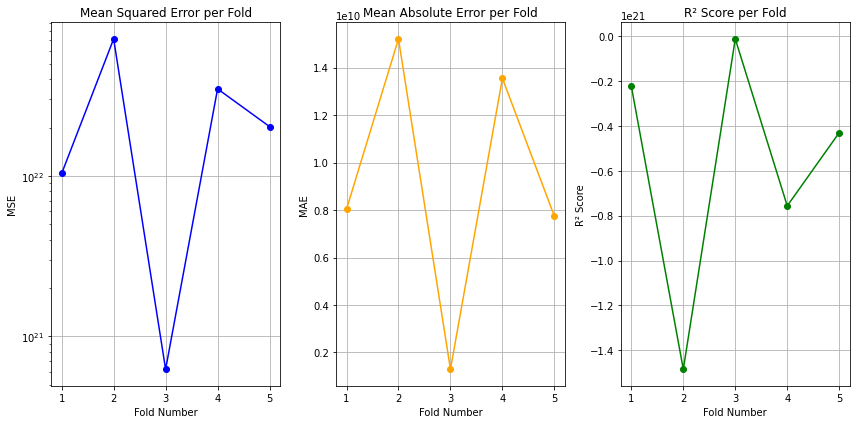

In [45]:
# Set the number of folds (K)
k_folds = np.arange(1, len(mse_list) + 1)

# Create subplots
plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(k_folds, mse_list, marker='o', color='blue', label='MSE')
plt.title('Mean Squared Error per Fold')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.yscale('log')  # Use log scale if needed
plt.xticks(k_folds)
plt.grid()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(k_folds, mae_list, marker='o', color='orange', label='MAE')
plt.title('Mean Absolute Error per Fold')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.xticks(k_folds)
plt.grid()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(k_folds, r2_list, marker='o', color='green', label='R²')
plt.title('R² Score per Fold')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(k_folds)
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


#### Ridge Regression

Ridge and Lasso are regularized linear regression techniques that add penalties to the loss function to prevent overfitting

In [48]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, Y_train)
y_pred = model_ridge.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print("mse: ", mse)
print("mae", mae)
print("rmse", rmse)
print("r2", r2)

mse:  42.6804356965055
mae 5.147100036927174
rmse 6.533026534195732
r2 0.09391877537130577


#### Ridge Regression with K-Cross Validation

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter

ridge_mse_scores = []
ridge_mae_scores = []
ridge_r2_scores = []

y = np.array(Y)  # Convert y to a NumPy array

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    ridge.fit(X_train, Y_train)
    Y_pred = ridge.predict(X_test)

    # Calculate metrics
    ridge_mse_scores.append(mean_squared_error(Y_test, Y_pred))
    ridge_mae_scores.append(mean_absolute_error(Y_test, Y_pred))
    ridge_r2_scores.append(r2_score(Y_test, Y_pred))

print("Ridge Regression Metrics:")
print("MSE:", np.mean(ridge_mse_scores))
print("MAE:", np.mean(ridge_mae_scores))
print("R²:", np.mean(ridge_r2_scores))

Ridge Regression Metrics:
MSE: 42.11674049612455
MAE: 5.127936724021409
R²: 0.10207293705051206


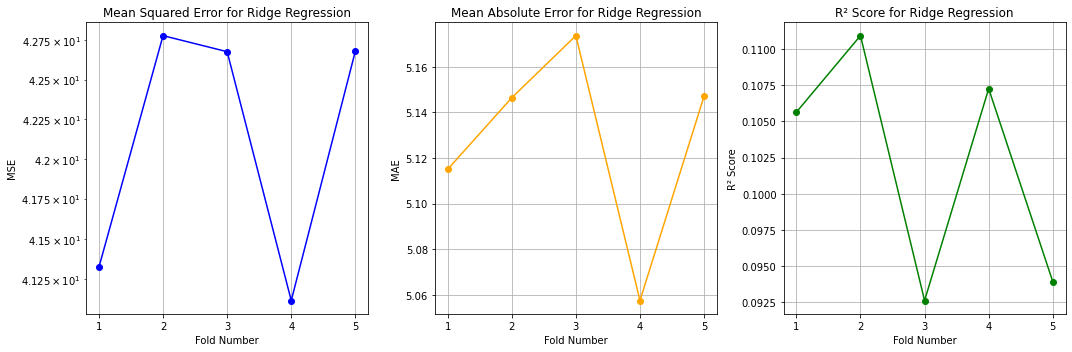

In [54]:
# Create subplots for the metrics
plt.figure(figsize=(15, 5))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(k_folds, ridge_mse_scores, marker='o', color='blue', label='MSE')
plt.title('Mean Squared Error for Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(k_folds)
plt.grid()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(k_folds, ridge_mae_scores, marker='o', color='orange', label='MAE')
plt.title('Mean Absolute Error for Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.xticks(k_folds)
plt.grid()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(k_folds, ridge_r2_scores, marker='o', color='green', label='R²')
plt.title('R² Score for Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(k_folds)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Lasso Regression 

In [50]:
model_lasso = Lasso(alpha=1, random_state= 32)
model_lasso.fit(X_train, Y_train)
y_pred = model_lasso.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print("mse: ", mse)
print("mae", mae)
print("rmse", rmse)
print("r2", r2)

mse:  47.11965195376684
mae 5.512641171875732
rmse 6.864375569108004
r2 -0.00032324529064120533


#### Lasso Regression with K-Cross Validation

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter

lasso_mse_scores = []
lasso_mae_scores = []
lasso_r2_scores = []
y = np.array(Y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    lasso.fit(X_train, Y_train)
    Y_pred = lasso.predict(X_test)

    # Calculate metrics
    lasso_mse_scores.append(mean_squared_error(Y_test, Y_pred))
    lasso_mae_scores.append(mean_absolute_error(Y_test, Y_pred))
    lasso_r2_scores.append(r2_score(Y_test, Y_pred))

print("Lasso Regression Metrics:")
print("MSE:", np.mean(lasso_mse_scores))
print("MAE:", np.mean(lasso_mae_scores))
print("R²:", np.mean(lasso_r2_scores))


Lasso Regression Metrics:
MSE: 44.34935780911404
MAE: 5.313739384017575
R²: 0.05447766062848587


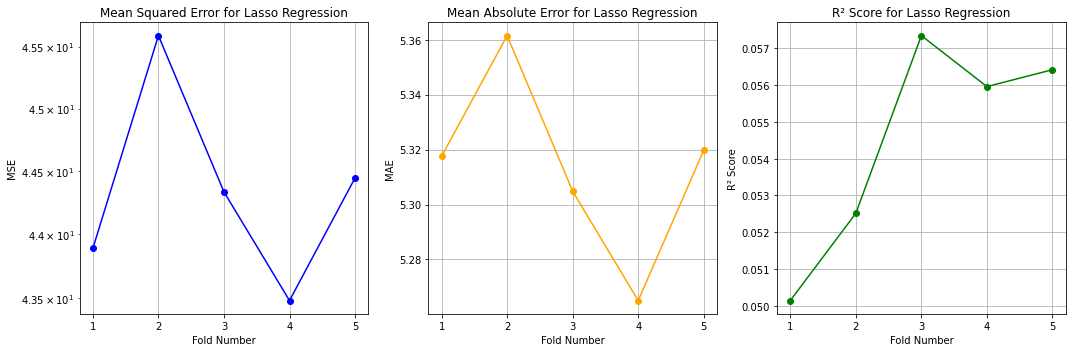

In [60]:
plt.figure(figsize=(15, 5))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(k_folds, lasso_mse_scores, marker='o', color='blue', label='MSE')
plt.title('Mean Squared Error for Lasso Regression')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(k_folds)
plt.grid()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(k_folds, lasso_mae_scores, marker='o', color='orange', label='MAE')
plt.title('Mean Absolute Error for Lasso Regression')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.xticks(k_folds)
plt.grid()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(k_folds, lasso_r2_scores, marker='o', color='green', label='R²')
plt.title('R² Score for Lasso Regression')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(k_folds)
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Predictions using Regression Models are not good. These are the steps we can use for the future modeling
* Increase dataset that has linear relationship between dependent variable and dependent variable.
* Use feature selection technique to select the most important features from a dataset. 
* Tuning hyperparameters
* Explore more complex models